In [37]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

* world_rank - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250)
* university_name - name of university
* country - country of each university
* teaching - university score for teaching (the learning environment)
* international - university score international outlook (staff, students, research)
* research - university score for research (volume, income and reputation)
* citations - university score for citations (research influence)
* income - university score for industry income (knowledge transfer)
* total_score - total score for university, used to determine rank
* num_students - number of students at the university

In [38]:
df = pd.read_csv('dataset/timesData.csv')
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [39]:
df['num_students'] = df['num_students'].str.replace(',', '')
df['num_students'] = df['num_students'].fillna(0)
df['num_students'] = df['num_students'].astype(str).astype(int)
df['num_students'] = df['num_students'].replace(0, round(np.mean(df.num_students),0))

df.num_students.unique()

array([ 20152,   2243,  11074,  15596,   7929,  18812,  19919,  36186,
        15060,  11751,  38206,  14221,  15128,  21424,  18178,  41786,
        66198,  25055,  20376,  11885,  19835,  26607,  44020,  15172,
        18334,  26199,  19967,   3055,  22020,  50152,  26518,  27233,
        42727,  31592,  31326,  40128,  40148,  12528,   2429,  25774,
        11385,   2400,  14604,   7774,  25581,  23333,   6333,   9666,
        26614,  14290,  12161,  46825,  10410,  35364,   8653,  56959,
        22809,  39763,  24789,  42056,  12338,  35691,  11829,  26485,
         9259,  51462,  29325,  17906,  17404,   6753,  41868,  23845,
        20771,  36534,   7867,  15521,  21394,  21908,   9027,  12001,
        34718,  28881,  25674,  15489,  34938,   8747,  28251,  20925,
        26583,   7326,  23823,  22193,  20541,  36429,  12551,  31331,
         6178,   2218,  35565,  23505,   8338,   6671,  37032,  39256,
        10221,  20040,  44501,  26389,  10441,   9586,   8176,  31891,
      

In [40]:
df['international'] = df['international'].str.replace('-', '0.0')
df['international'] = df['international'].astype(str).astype(float)
df['international'] = df['international'].replace(0.0, round(np.mean(df.international),1))

df.international.unique()

array([ 72.4,  54.6,  82.3,  29.5,  70.3,  77.7,  77.2,  39.6,  90. ,
        59.2,  48.1,  62.8,  58.5,  62.4,  93.7,  53.3,  51.8,  90.9,
        32.9,  39.1,  91.4,  90.8,  49. ,  49.4,  60.5,  18.4,  73.2,
        32.6,  64.3,  93.3,  21.5,  31.6,  55.9,  97.8,  85.9,  88. ,
        68.6,  56.4,  77.9,  67.3,  97.4,  44.9,  93.9,  44.5,  43.7,
        31.2, 100. ,  66.3,  22.1,  23. ,  28.3,  22.6,  43. ,  38.1,
        31.8,  52.3,  43.1,  35.6,  25.2,  56.5,  64. ,  31.7,  67.2,
        16.7,  89.6,  42.2,  87.5,  20.9,  84.2,  52.2,  36.7,  72.8,
        74.2,  66.6,  63.4,  22.5,  65.7,  99.5,  79.1,  92.9,  56.8,
        69. ,  87.9,  24.4,  87. ,  21.9,  91.3,  35.4,  31. ,  37.6,
        85.3,  24.2,  85.7,  48. ,  26.8,  62.6,  34.1,  83.3,  19.9,
        71.8,  47.7,  24.8,  29.2,  34.2,  63. ,  95.7,  29.6,  50.2,
        91. ,  30.4,  24.7,  73.8,  40. ,  71.6,  55.1,  20.1,  46.2,
        84.1,  62.7,  30.6,  30.7,  54.4,  22.3,  52.6,  24.3,  94.3,
        19.3,  82.9,

In [41]:
df['income'] = df['income'].str.replace('-', '0.0')
df['income'] = df['income'].astype(str).astype(float)
df['income'] = df['income'].replace(0.0, round(np.mean(df.income),0))

df.income.unique()

array([ 34.5,  83.7,  87.5,  64.3,  45. ,  57. ,  73.5,  92.9, 100. ,
        34.7,  59.6,  43.7,  53.7,  56.5,  39. ,  32.8,  95.1,  89.8,
        42.6,  50.2,  51.8,  40.5,  47.7,  98.6,  42.2,  64.1,  30.7,
        73.3,  31.7,  29.2,  38. ,  30.3,  84.2,  48. ,  53.9,  67.1,
        97.8,  29.6,  40.4,  37.9,  36.2,  90.8,  52.7,  31.6,  44.1,
        29.1,  57.1,  39.1,  33.9,  38.4,  30.5,  33.2,  37.7,  43.8,
        45.8,  26.1,  30.2,  32.6,  44. ,  43. ,  26.7,  32.4,  60.5,
        99.8,  35.7,  32.7,  97.7,  43.4,  38.9,  95.5,  97.1,  28.8,
        44.5,  61. ,  73.4,  27.4,  82.3,  79.8,  41.5,  42.5,  40.3,
        81.4,  26.4,  49.3,  30. ,  55.3,  61.1,  34.8,  36. ,  39.5,
        57.2,  47. ,  99.4,  31.1,  60. ,  40. ,  49.6,  50.1,  37.5,
        38.8,  40.6,  61.5,  38.3,  34.2,  41.2,  41.6,  29.7,  27.8,
        40.8,  29.4,  98.7,  56.6,  43.9,  32.2,  49.8,  35. ,  32.3,
        32.5,  27. ,  26.3,  70.3,  99.9,  97. ,  35.9,  63.8,  62.1,
        81. ,  55.5,

In [42]:
df['student_staff_ratio'] = df['student_staff_ratio'].fillna(0)
df['student_staff_ratio'] = df['student_staff_ratio'].astype(str).astype(float)
df['student_staff_ratio'] = df['student_staff_ratio'].replace(0.0, round(np.mean(df.student_staff_ratio),0))

df.student_staff_ratio.unique()

array([  8.9,   6.9,   9. ,   7.8,   8.4,  11.8,  11.6,  16.4,  11.7,
         4.4,  10.3,   3.6,  10.2,  14.7,  19.5,   5.9,   6.5,  13.1,
        17.6,  10.7,   4.8,  13.8,   5.7,  20.1,  10.1,  27.3,   7.3,
        18.7,  15.5,  13.7,  23.7,   8.3,  14.1,  23.8,   7.9,  19.2,
        11.5,  25.6,  18. ,  10.5,  16.1,  10. ,  13.9,  13. ,   5.6,
         8.6,   6.8,   4.5,   5.8,   6.4,  13.4,  14. ,  22.7,   5.5,
        20.2,  30.1,  12.9,  11.4,  10.9,  17.4,  32.7,  24.5,  16.9,
        15.7,  15.3,  15.9,  13.5,   4.6,  19.3,  12. ,  12.7,  17.3,
         6.6,   8. ,  31.5,  15.1,  15. ,  18.1,  12.1,  12.4,  11. ,
        16. ,  11.9,  22. ,  41.9,  13.3,   5. ,  34.1,  14.9,  17.1,
        21.6,  21.5,  31.2,  11.1,  20.3,  16.3,   8.7,  12.2,  15.4,
        17. ,  18.9,  23.3,  18.2,  25.9,  15.8,  19.4,  17.2,  15.2,
        18.3,  13.6,  29.9,  19.6,   8.5,  14.4,  38.4,  16.6,   9.3,
        67.8,  16.2,   4.1,  52.5,  40.5,  70.4,  27.6,  22.2,  18.8,
        59.1,  24.6,

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   float64
 8   total_score             2603 non-null   object 
 9   num_students            2603 non-null   int64  
 10  student_staff_ratio     2603 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memor

In [44]:
df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students                0
student_staff_ratio         0
international_students     67
female_male_ratio         233
year                        0
dtype: int64

/var/folders/wm/yj20p_cn5cd7_yb59k7dzks40000gn/T/ipykernel_6914/3770598804.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin = -1, annot= True)


<Axes: >

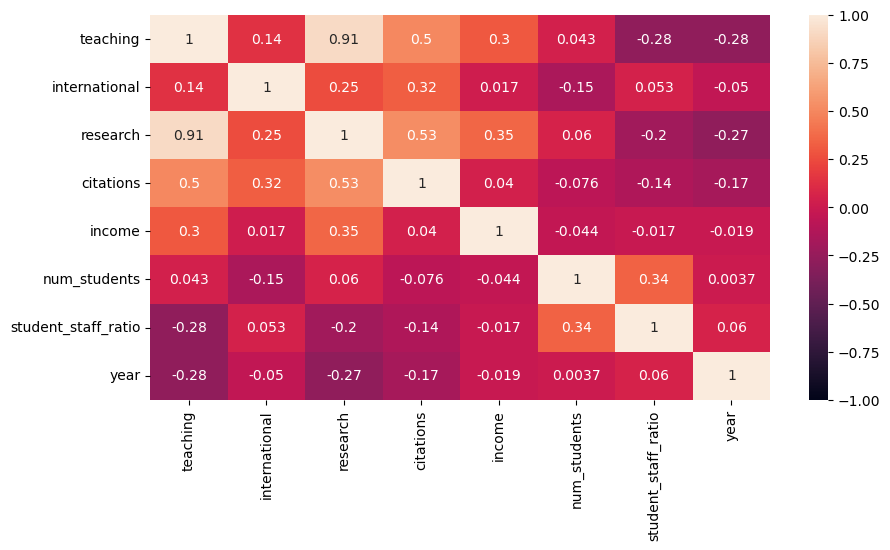

In [45]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(df.corr(), vmin = -1, annot= True)
#зависимость между качеством преподавания и оценкой университета

In [71]:
filter_df = df[df['country'] == 'Unisted States of America']
filter_df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2019,201-250,University of Hawai’i at Mānoa,Unisted States of America,32.0,63.4,35.5,67.7,44.7,-,23333,18.0,NaN,NaN,2016


Text(0.5, 0.98, 'Number of universities ranked over the years')

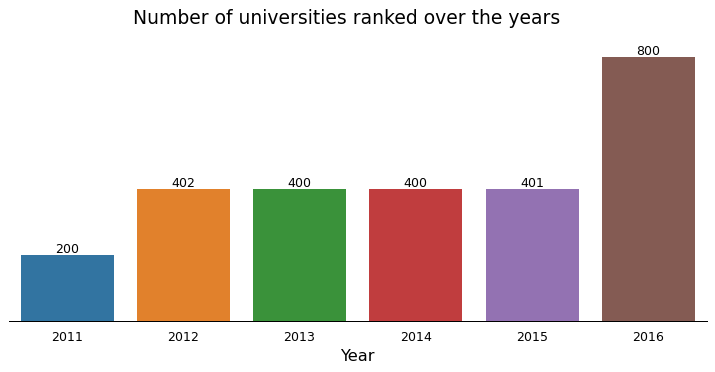

In [76]:
year_df = df['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize = (10,4), dpi = 90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom = False)
ax.get_yaxis().set_visible(False)

sns.countplot(data = df, x = 'year')

ax.bar_label(ax.containers[0])

ax.set_xlabel('Year', fontsize = 13, color = 'black')
fig.suptitle('Number of universities ranked over the years', fontsize = 15, color = 'black')

In [47]:
list_of_country = list(df.country.unique()) # есть некорректное название страны Unisted States of America

unreal_name_country = "Unisted States of America"
if unreal_name_country in list_of_country: list_of_country.remove(unreal_name_country) # there is no country like "Unisted States of america". 
                                                                                        # This might have written wrongly ,anyway we delete this.

list_of_country

['United States of America',
 'United Kingdom',
 'Switzerland',
 'Canada',
 'Hong Kong',
 'Japan',
 'South Korea',
 'Singapore',
 'Australia',
 'China',
 'France',
 'Sweden',
 'Germany',
 'Republic of Ireland',
 'Finland',
 'Taiwan',
 'South Africa',
 'Turkey',
 'Netherlands',
 'Belgium',
 'Denmark',
 'Norway',
 'Spain',
 'New Zealand',
 'Egypt',
 'Austria',
 'Israel',
 'Brazil',
 'Italy',
 'Russian Federation',
 'Greece',
 'Iceland',
 'Czech Republic',
 'India',
 'Poland',
 'Iran',
 'Portugal',
 'Thailand',
 'Chile',
 'Estonia',
 'Saudi Arabia',
 'Mexico',
 'Colombia',
 'Macau',
 'Morocco',
 'Luxembourg',
 'Cyprus',
 'Unted Kingdom',
 'Uganda',
 'Malaysia',
 'Lebanon',
 'Romania',
 'Slovenia',
 'Pakistan',
 'Hungary',
 'United Arab Emirates',
 'Belarus',
 'Serbia',
 'Slovakia',
 'Bangladesh',
 'Ghana',
 'Nigeria',
 'Indonesia',
 'Jordan',
 'Latvia',
 'Kenya',
 'Argentina',
 'Qatar',
 'Oman',
 'Ukraine',
 'Lithuania']

In [48]:
sum(filter_df['research'])/len(filter_df.country)

45.15220030349018

In [49]:
research_rate = [] # по стране
for c in list_of_country:
    each_country = df[df["country"] == c]
    research_ratio = sum(each_country.research) / len(each_country)
    research_rate.append(research_ratio)

In [50]:
research_rate

[45.15220030349018,
 37.417333333333325,
 44.39574468085106,
 42.26759259259259,
 46.75882352941177,
 32.992857142857154,
 39.82631578947367,
 68.09166666666667,
 36.11880341880343,
 30.393975903614443,
 26.34520547945205,
 43.76491228070177,
 33.75065789473683,
 24.509677419354833,
 27.378125000000004,
 34.04912280701754,
 31.29,
 25.212121212121207,
 51.93066666666666,
 38.73783783783784,
 32.92758620689655,
 28.31428571428571,
 19.235087719298242,
 25.666666666666668,
 12.2,
 23.535483870967735,
 42.3578947368421,
 27.308000000000007,
 20.37553191489361,
 24.855000000000004,
 16.036363636363635,
 22.1,
 17.26923076923077,
 20.036666666666665,
 12.515384615384617,
 26.96153846153846,
 19.733333333333334,
 11.036363636363637,
 13.3,
 20.84,
 14.366666666666669,
 28.16666666666667,
 13.780000000000001,
 18.65,
 6.4,
 26.7,
 28.5,
 20.4,
 10.6,
 15.14,
 11.2,
 10.375,
 12.55,
 8.45,
 11.216666666666667,
 12.7,
 8.7,
 13.2,
 9.45,
 7.2,
 15.6,
 11.1,
 8.0,
 6.95,
 10.2,
 9.0,
 9.0,
 10.3

In [51]:
df_new = pd.DataFrame({"country": list_of_country , "research": research_rate }) 
sorted_df = df_new.reindex(df_new["research"].sort_values(ascending= False).index)
sorted_df

,country,research
7,Singapore,68.091667
18,Netherlands,51.930667
4,Hong Kong,46.758824
0,United States of America,45.152200
2,Switzerland,44.395745
...,...,...
53,Pakistan,8.450000
62,Indonesia,8.000000
59,Bangladesh,7.200000
63,Jordan,6.950000


In [52]:
# plt.figure(figsize = (17, 5))
# height = sorted_df.research
# bars = sorted_df.country
# y_pos = np.arange(len(bars))
# plt.bar(y_pos, height)
# plt.xticks(y_pos, bars, rotation= 90)
# plt.suptitle('World University Research')
# plt.xlabel("Country")
# plt.ylabel("Research")
# plt.show()

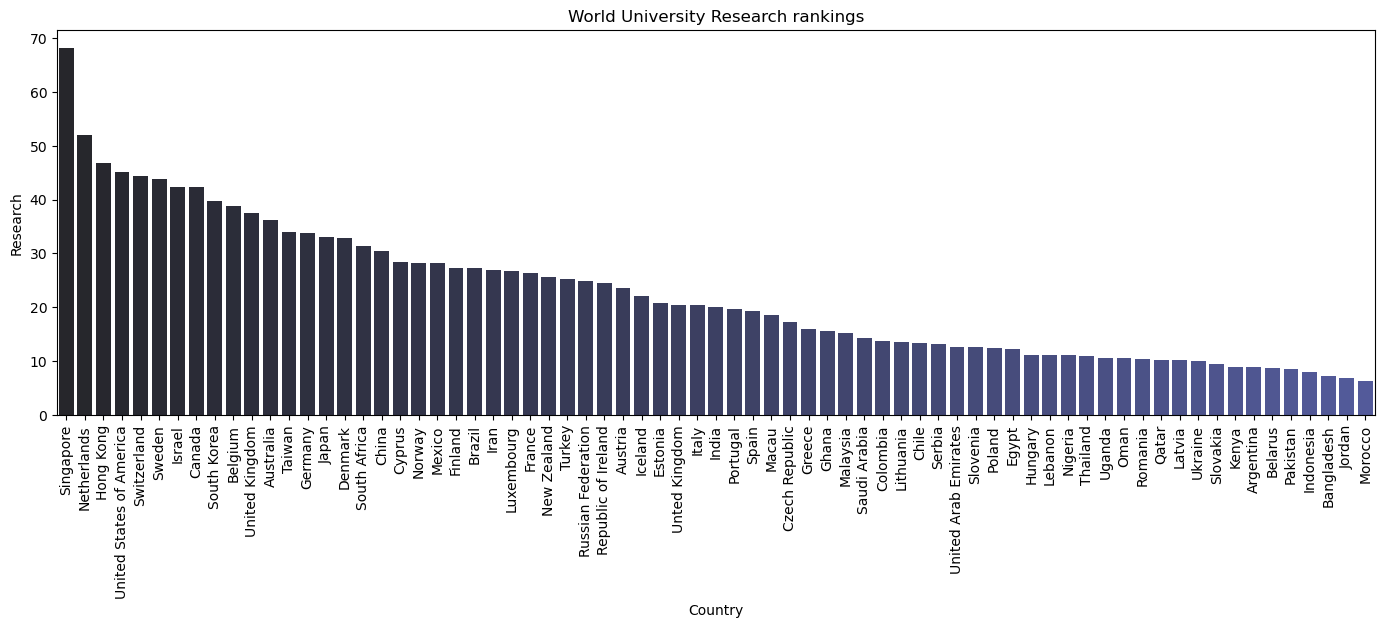

In [58]:
plt.figure(figsize = (17, 5))
sns.barplot(x = sorted_df['country'] , y = sorted_df['research'], palette = sns.dark_palette("#4751a6", len(sorted_df)))
plt.xticks(rotation = 90)
plt.title("World University Research rankings")
plt.xlabel("Country")
plt.ylabel("Research")
plt.show()

In [54]:
teaching_rate = [] # по стране
for c in list_of_country:
    each_country = df[df["country"] == c]
    teaching_ratio = sum(each_country.teaching) / len(each_country)
    teaching_rate.append(teaching_ratio)

In [55]:
teaching_rate

[47.944309559939285,
 37.170666666666655,
 45.172340425531935,
 39.00740740740743,
 42.58235294117647,
 40.838775510204115,
 42.21754385964912,
 56.5,
 31.852136752136758,
 38.78915662650601,
 35.591780821917794,
 35.7157894736842,
 39.3032894736842,
 28.6741935483871,
 28.653125,
 30.161403508771926,
 27.234999999999996,
 27.17575757575758,
 40.970666666666666,
 35.62972972972973,
 31.079310344827576,
 29.785714285714285,
 24.88947368421052,
 22.996666666666666,
 21.3,
 30.535483870967745,
 38.757894736842104,
 36.308,
 25.396808510638284,
 39.114999999999995,
 18.354545454545455,
 13.14,
 23.9,
 32.33,
 20.692307692307693,
 27.299999999999997,
 22.783333333333328,
 19.28181818181818,
 19.5625,
 19.36,
 21.433333333333334,
 32.53333333333333,
 17.32,
 17.8,
 16.85,
 25.0,
 18.0,
 18.4,
 15.1,
 23.6,
 27.7,
 25.799999999999997,
 21.0,
 19.65,
 19.166666666666668,
 15.600000000000001,
 20.2,
 20.4,
 23.15,
 21.7,
 15.6,
 22.7,
 18.1,
 17.7,
 22.6,
 13.7,
 16.0,
 9.9,
 21.3,
 24.79999999

In [56]:
df_new2 = pd.DataFrame({"country": list_of_country , "teaching": teaching_rate }) 
sorted_df2 = df_new2.reindex(df_new2["teaching"].sort_values(ascending= False).index)
sorted_df2

,country,teaching
7,Singapore,56.500000
0,United States of America,47.944310
2,Switzerland,45.172340
4,Hong Kong,42.582353
6,South Korea,42.217544
...,...,...
60,Ghana,15.600000
48,Uganda,15.100000
65,Kenya,13.700000
31,Iceland,13.140000


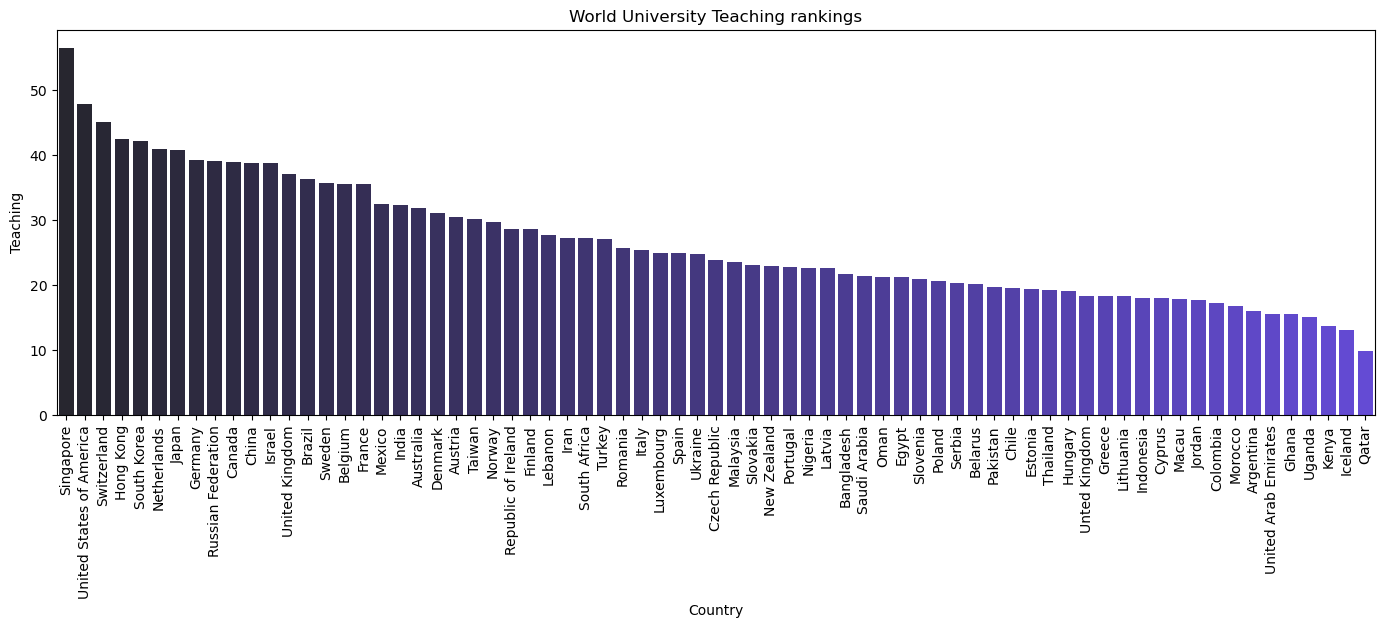

In [59]:
plt.figure(figsize = (17, 5))
sns.barplot(x = sorted_df2['country'] , y = sorted_df2['teaching'], palette = sns.dark_palette("#5534eb", len(sorted_df2)))
plt.xticks(rotation = 90)
plt.title("World University Teaching rankings")
plt.xlabel("Country")
plt.ylabel("Teaching")
plt.show()

Text(0.5, 1.0, 'Teaching & Research ')

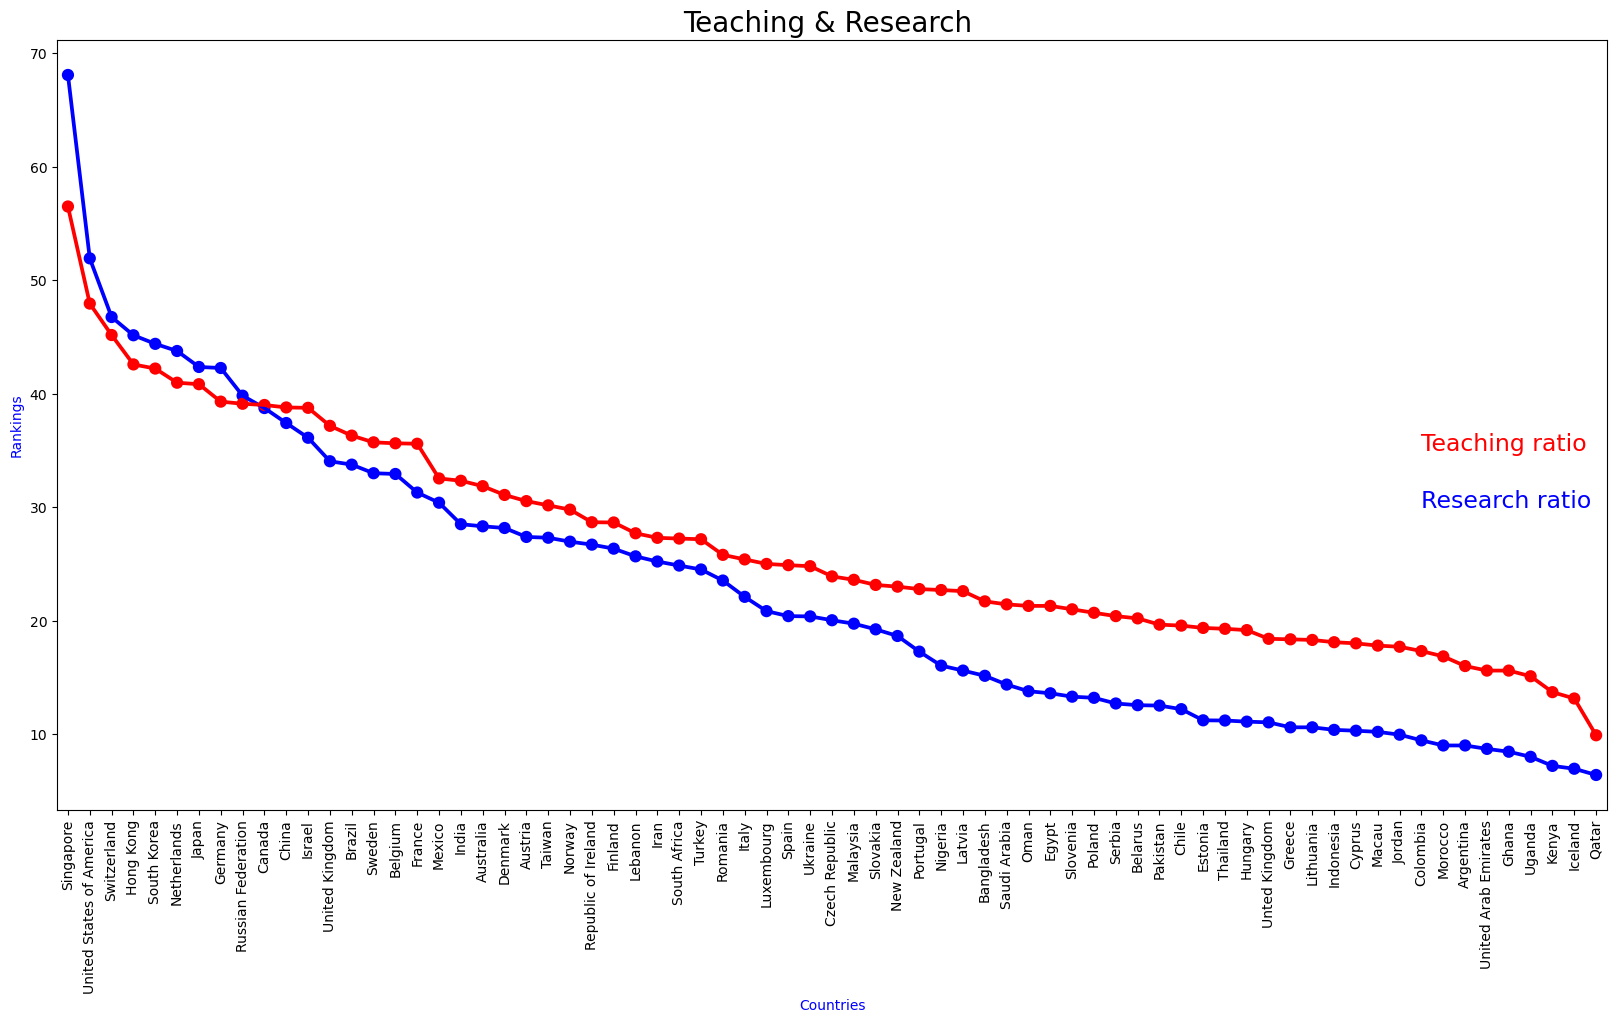

In [113]:
plt.subplots(figsize = (20,10))
sns.pointplot(x = "country" , y = "research" , data = sorted_df , color = "blue")
sns.pointplot(x = "country" , y = "teaching" , data = sorted_df2 , color = "red")
plt.text(62,35,'Teaching ratio', color='red', fontsize = 17)
plt.text(62,30,'Research ratio', color='blue', fontsize = 17)
plt.xlabel('Countries',color='blue')
plt.ylabel('Rankings', color='blue')
plt.xticks(rotation = 90)
plt.title('Teaching & Research ', fontsize = 20, color = 'black')

<font size = 5>Выводы</font>:

Были предоставлены данные собранные в промежутке 2011 - 2016 годов. Можно заметить, что с течением времени увеличилось количество университетов принимаемых участие в исследовании.<br/><br/> 
В результате исследования были сформированы усредненые показатели за все время для оценок университетов по результатам исследования и университетского балла преподавания, в разрезе стран.<br/><br/>
Можно обратить внимание, что в лидерах по этим двум показателям находятся Сингапур, США, Щвейцария - что свидетельствует о высоком качестве подготовки студентов. В то время как наиболее отстающими считаются Катар, Исландия, Кения.

<font size = 5> 
<font color = #EAEF55>Создаем выборки</font>

1. Случайный образец

In [129]:
df1 = df.sort_values(by = ['teaching']).reset_index(drop = True)
df1.sample(frac = 0.2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
326,201-225,"St George’s, University of London",United Kingdom,20.0,57.9,22.6,89.7,44.1,-,2958,13.4,17%,61 : 39,2013
1891,97,"University of Maryland, College Park",United States of America,44.9,40.4,51.4,83.9,32.1,57.9,31331,8.4,9%,48 : 52,2013
934,301-350,University of South Australia,Australia,28.4,81.0,25.0,34.1,83.7,-,18971,26.2,32%,59 : 41,2013
1146,301-350,Sungkyunkwan University (SKKU),South Korea,31.4,26.6,32.1,23.9,99.4,-,24365,20.3,9%,39 : 61,2012
735,226-250,State University of New York Albany,United States of America,25.7,25.9,30.8,53.5,92.9,-,15387,18.5,8%,51 : 49,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,41,Hong Kong University of Science and Technology,Hong Kong,50.4,97.4,51.8,98.2,64.1,69.0,11385,23.8,36%,NaN,2011
1181,301-350,Wayne State University,United States of America,32.0,30.7,15.2,61.0,45.0,-,23065,10.7,7%,57 : 43,2015
2149,70,Heidelberg University,Germany,52.6,63.1,45.4,81.4,41.6,59.6,28881,24.5,17%,55 : 45,2015
1106,301-350,University of Bremen,Germany,30.9,50.0,32.7,50.0,46.0,-,18590,25.6,11%,50 : 50,2016


2. Выборка через train_test_split

In [153]:
from sklearn.model_selection import train_test_split

df2 = df.copy(deep = True)

train, test = train_test_split(df2, test_size = 0.2)
test

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
689,88,McMaster University,Canada,42.3,66.9,47.9,81.7,98.0,59.0,23823,19.3,15%,53 : 47,2013
2045,201-250,University of Technology Sydney,Australia,27.0,90.1,35.1,66.9,42.3,-,24519,44.1,31%,53 : 47,2016
427,226-250,Carleton University,Canada,17.0,58.6,24.2,61.6,45.0,-,25036,29.8,18%,47 : 53,2012
278,79,Leiden University,Netherlands,45.4,54.4,55.3,71.7,48.6,57.0,21222,17.1,10%,59 : 41,2012
1754,351-400,Aberystwyth University,United Kingdom,20.7,66.5,20.6,52.2,33.0,-,9252,19.2,18%,48 : 52,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,201-250,University of the Witwatersrand,South Africa,26.2,68.4,31.5,76.0,99.7,-,23321,18.6,9%,56 : 44,2016
1881,79,University of Pittsburgh,United States of America,50.6,33.9,50.3,92.3,39.3,61.5,26485,5.8,10%,51 : 49,2016
2410,601-800,Aligarh Muslim University,India,28.3,18.7,10.0,20.9,29.6,-,11197,10.5,2%,17 : 83,2016
739,137,Tohoku University,Japan,57.7,32.0,55.6,48.9,80.7,53.1,17200,5.0,7%,25 : 75,2013


3. Выборка через np.random.rand

In [174]:
df3 = df.copy(deep = True)

msk = np.random.rand(len(df3)) < 0.2
test1 = df[msk]
test1

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25%,NaN,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22%,42 : 58,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060,11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,45.0,89.5,11751,4.4,20%,50 : 50,2011
11,12,University of Chicago,United States of America,79.1,62.8,87.9,96.9,45.0,86.9,14221,6.9,21%,42 : 58,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,601-800,Universiti Kebangsaan Malaysia,Malaysia,24.3,29.7,15.9,10.9,28.4,-,24227,11.8,12%,62 : 38,2016
2587,601-800,Ural Federal University,Russian Federation,24.8,17.3,10.6,16.8,35.6,-,28427,10.1,3%,48 : 52,2016
2588,601-800,V.N. Karazin Kharkiv National University,Ukraine,21.7,48.4,8.9,1.7,28.8,-,14410,9.7,22%,53 : 47,2016
2596,601-800,University of Westminster,United Kingdom,17.3,81.9,11.7,21.1,28.5,-,16609,21.0,43%,57 : 43,2016


4. Выборка строк с начала и с конца

In [181]:
row_count = df.shape[0]
split_point = int(row_count * 0.2)
test_data, train_data = df[:split_point], df[split_point:]
test_data

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,45.0,94.2,7929,8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,301-350,Lehigh University,United States of America,20.2,26.5,18.1,44.9,38.6,-,6300,11.3,15%,44 : 56,2012
516,301-350,Linköping University,Sweden,19.6,48.6,18.9,42.8,31.8,-,17866,7.7,10%,52 : 48,2012
517,301-350,National Taiwan University of Science and Tech...,Taiwan,24.3,15.6,37.0,19.4,42.9,-,7446,17.4,11%,34 : 66,2012
518,301-350,Plymouth University,United Kingdom,12.9,49.0,13.7,58.1,25.8,-,24121,25.9,13%,52 : 48,2012
